# Program słuzacy do obliczeń zwiazanych z połozeniem planet
## Wy programie wykorzystujemy biblioteke AstroLib oraz Plot

Niestety aktualna werja biblioteki AstroLib posiada w sobie mały bład.
Tyczy sie on zle zdefiniowanego okresu orbitalnego marsa.

Aby go usunać wystarczy przejść do katalogu .julia/packages/AstroLib/Wmr2L/src 
i w pliku common.jl na samym dole w definicji marsa zmienić 87.9691*86400 (usmy argument) na 687.9691*86400

**Naprawa tego błędu nie jest wymagana aby program funkcjonował**

In [1]:
include("PlanetSystem.jl")

Main.PlanetarySystem

In [2]:
using Main.PlanetarySystem

## Moduł PlanetarySystem zawiera w sobie kilka przydatnych funkcji
### Najwazniejsza funkcja w module jest "Animation"

In [3]:
? Animation()

```
Animation(List; days = 8, maxDay = nothing, directory = "SolarSystem", fps = 15, elips = true)

Funkcja tworząca animacje wybranych planet układu Słonecznego.
Aby działała poprwnie należy podać jej listę z nazwami wybranych
planet z układu słonecznego. Pozwola ona równierz na tworzenie własnych
orbitali. Należy podać typlę z odpowiednimi argumentami:
("nazwa planety", okres obiegu wokół słońca, zakrzywienie elipsy (mimośród), półoś wielka elipsy, i kąt nachylenia elipsy)
Przykładowym wywołanie tej funkcji jest np.
Animation(["earth", "venus",  "mercury", ("Death Star", 3.15581497635456e7, 0.00677672, 1.0820947453737917e11, 1.149691)], days = 4, maxDay = 366, directory = "System", fps = 15, elips = true).
Funkcja wykorzystuje keywords, pozwala to na wybrane dowolnego argumentu opcionalnego bez potrzeby wbisywania 
wszystkich poprzednich (np. fps = 30)

List - lista planet
days - co ile dni mierzymy pozycje planety (opcionalne, domyślnie 8)
maxDay - dzień do którego liczymy pozycję planet (opcionalne)
directory - kierunek i nazwa animacji(opcjinalne, domyślnie "SolarSystem.gif")
fps - ilość klatek na sekundę animacji
elips -  decyduje czy funkcja będzie rysować tor ruchu planet (opcionalne, domyślnie true)
```


┌ Info: Saved animation to 
│   fn = d:\Users\admin\Desktop\projekt\Projekt\System.gif
└ @ Plots C:\Users\admin\.julia\packages\Plots\vTdnV\src\animation.jl:98


Plots.AnimatedGif("d:\\Users\\admin\\Desktop\\projekt\\Projekt\\System.gif")
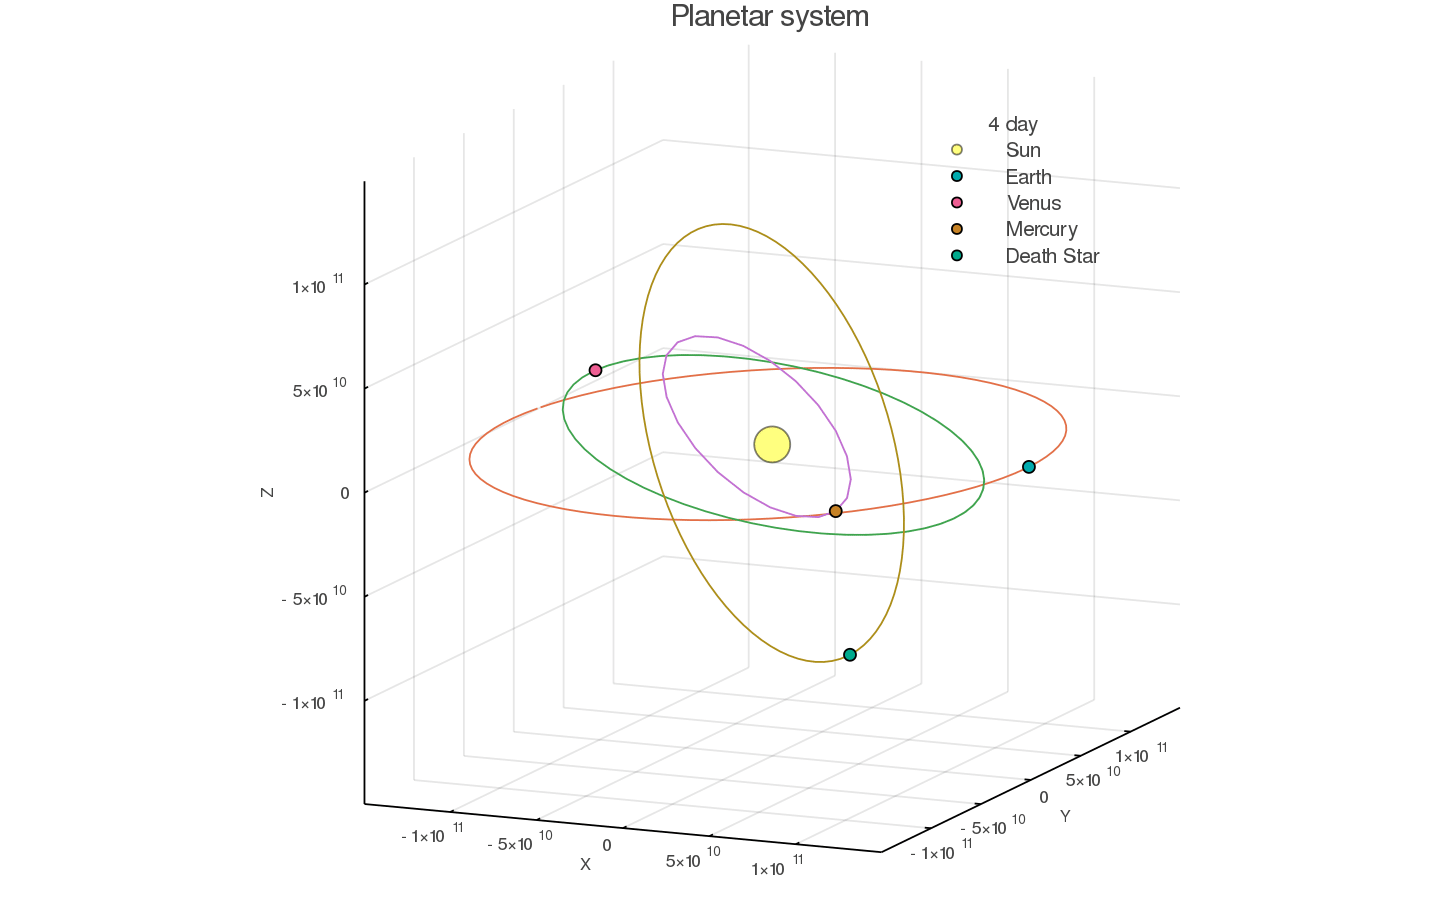

In [5]:
Animation(["earth","venus",  "mercury", ("Death Star", 3.15581497635456e7, 0.00677672, 1.0820947453737917e11, 1.149691)], days = 4, maxDay = 366, directory = "System", fps = 15, elips = true)


## Funkcja get_mean_anomali_list

In [4]:
? get_mean_anomali_list

search: get_mean_anomali_list



```
get_mean_anomali_list(Period, days = 3, endDays = 365)    

Zwraca liste "średniej anomali".

M = 2*π/T*t
M - średnia anomalia
T - okres orbitalny(Period)
t - moment czasu dla którego liczymy anomalię
```


### Przykładowe użycie
Średnia anomalia dla ziemi liczona co 3 dni

In [13]:
get_mean_anomali_list(3.15581497635456e7)

122-element Array{Float64,1}:
 0.01720212416151879
 0.06880849664607516
 0.12041486913063153
 0.1720212416151879
 0.22362761409974427
 0.27523398658430065
 0.326840359068857
 0.37844673155341335
 0.4300531040379697
 0.4816594765225261
 0.5332658490070825
 0.5848722214916389
 0.6364785939761952
 ⋮
 5.693903097462719
 5.745509469947277
 5.7971158424318325
 5.848722214916388
 5.900328587400946
 5.951934959885501
 6.003541332370058
 6.055147704854614
 6.106754077339171
 6.158360449823727
 6.2099668223082825
 6.26157319479284

## Funkcja get_eccentric_anomali

In [5]:
? get_eccentric_anomali

search: get_eccentric_anomali



```
get_eccentric_anomali(M, e)

Zwraca "Anomalie mimośrodową" w zaleznosci od
dnia M (średnia anomalia) i e (mimośród).
```


### Przykładowe użycie
Anomalia mimośrodową dla ziemi dla średnia anomalia = 45°

In [30]:
get_eccentric_anomali(pi/4,0.01671123)

0.7973552315548195

## Funkcja get_theta

In [6]:
? get_theta

search: get_theta



```
get_theta(M, e)

Zwraca kąty jakie dana planeta zatoczyła w zaleznosci
od M (średnia anomalia) i e (mimośród)
```


### Przykładowe użycie
Zwróć kat jaki zatoczył Marsu dla M = 45°

In [28]:
get_theta(pi/4,0.0933941)

0.8538208313335292

## Funkcja get_radius

In [7]:
? get_radius

search: get_radius



```
get_radius(theta,e,semi_majo)

Zwróć odległość danej planety od gwiazdy w zaleznosci od katu,
e (mimośród) i półosi wielkiej.
```


### Przykładowe użycie
Odległość ziemi od śłonca dla katu 45° (Prawdziwa Anomalia uzyskana np z funkcji get_theta) 

In [29]:
get_radius(pi/4,0.01671123,1.495982611504425e11)

1.4780986989672565e11

## Funkcja transform_3D

In [8]:
? transform_3D

search: transform_3D



```
transform_3D(x,y,Theta)

Funkcja obraca elipsy wokół osi OY o podany kat.

x`= cosθ
y`= y
z = -sinθ
```


### Przykładowe użycie
Obrót punktu (1,2) o 90° względem OY

In [31]:
transform_3D(1,2,pi)

(-1.0, 2, -1.2246467991473532e-16)

## Funkcja DataPlanet 
### Druga najważniejsza funkcja w module


In [9]:
?  DataPlanet

search: DataPlanet



```
DataPlanet(planet, days = 3, endDays = 365)        

Funkcja zwracająca listy promieni i położeń (R, x, y, z)

planet - wybrana planeta
days - co ile dni są liczone dane
endDays - dzień do którego liczone są dane
```


### Przykładowe użycie

In [50]:
[DataPlanet("earth")[1] DataPlanet("earth")[2] DataPlanet("earth")[3] DataPlanet("earth")[4]]

122×4 Array{Float64,2}:
 1.47099e11  0.999847   0.0174911  1.53077e-5
 1.47104e11  0.997553   0.0699101  1.52725e-5
 1.47116e11  0.992514   0.122134   1.51954e-5
 1.47135e11  0.984743   0.174015   1.50764e-5
 1.47161e11  0.974264   0.22541    1.4916e-5
 1.47192e11  0.961107   0.276176   1.47146e-5
 1.47231e11  0.945311   0.32617    1.44727e-5
 1.47275e11  0.926922   0.375253   1.41912e-5
 1.47326e11  0.905994   0.42329    1.38708e-5
 1.47383e11  0.882587   0.470149   1.35124e-5
 1.47445e11  0.85677    0.515699   1.31171e-5
 1.47514e11  0.828617   0.559816   1.26861e-5
 1.47588e11  0.79821    0.60238    1.22206e-5
 ⋮                                 
 1.4752e11   0.826105  -0.563516   1.26477e-5
 1.47451e11  0.854454  -0.519527   1.30817e-5
 1.47388e11  0.880474  -0.474094   1.34801e-5
 1.47331e11  0.90409   -0.427343   1.38416e-5
 1.47279e11  0.925232  -0.379401   1.41653e-5
 1.47234e11  0.94384   -0.330401   1.44502e-5
 1.47195e11  0.95986   -0.28048    1.46955e-5
 1.47163e11  0.973244

## Funkcja MaxT

In [10]:
? MaxT

search: MaxT maxintfloat Cintmax_t Cuintmax_t MaxR max maximum maximum! argmax



```
MaxT(Planets)  

Funkcja zwracająca największy okres obiegu

Planets - lista planet
```


### Przykładowe użycie 
Dla ziemi i wenus

In [46]:
MaxT(["earth","venus"])

365.0

## Funkcja MaxR

In [47]:
? MaxR

search: MaxR MaxT max maximum maximum! maxintfloat argmax typemax findmax!



```
MaxR(Planets)  

Funkcja zwracająca największy promień

Planets - lista planet
```


### Przykładowe użycie
Dla ziemi i jowisza

In [49]:
MaxR(["earth","jupiter"])

7.783408166927108e11

## Funkcja CreateDataList
Funkcja działa bardzo podobnie jak DataPlanet tylko jako argument podajemy liste wielu planet

In [12]:
? CreateDataList

search: CreateDataList



```
CreateDataList(days, T, list)  

Zwróć liste odlegosci,współzednych x, współzednych y, współzednych z
w zaleznosci od dnia

days - Co ile dni ma byc zwracana wartosc
T - Ostati dzień
list - lista planet dla ktorych maja byc zwrucone wartosci
```


## Przykładowe użycie
Uzyskanie listy odległości ziemi i jowisza liczonych co 3 dni 

In [61]:
list=CreateDataList(3,365,["earth","jupiter"])
[list[1][1] list[1][2]]

122×2 Array{Float64,2}:
 1.47099e11  7.4068e11
 1.47104e11  7.4068e11
 1.47116e11  7.40682e11
 1.47135e11  7.40684e11
 1.47161e11  7.40687e11
 1.47192e11  7.4069e11
 1.47231e11  7.40694e11
 1.47275e11  7.40699e11
 1.47326e11  7.40705e11
 1.47383e11  7.40711e11
 1.47445e11  7.40718e11
 1.47514e11  7.40726e11
 1.47588e11  7.40734e11
 ⋮           
 1.4752e11   7.44936e11
 1.47451e11  7.45012e11
 1.47388e11  7.45089e11
 1.47331e11  7.45166e11
 1.47279e11  7.45244e11
 1.47234e11  7.45322e11
 1.47195e11  7.45401e11
 1.47163e11  7.45481e11
 1.47137e11  7.45562e11
 1.47118e11  7.45643e11
 1.47105e11  7.45724e11
 1.47099e11  7.45806e11